In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [5]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [6]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(287,)

In [7]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(287, 50, 50)

In [8]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [9]:
imgs = np.expand_dims(imgs, -1)

In [10]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [11]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [12]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20


14/14 [==============================] - 25s 2s/step - loss: 3.3751 - accuracy: 0.0372 - val_loss: 3.2398 - val_accuracy: 0.0833
Epoch 2/20
14/14 [==============================] - 23s 2s/step - loss: 2.7558 - accuracy: 0.2837 - val_loss: 2.0565 - val_accuracy: 0.4167
Epoch 3/20
14/14 [==============================] - 24s 2s/step - loss: 1.0184 - accuracy: 0.7023 - val_loss: 1.0333 - val_accuracy: 0.6389
Epoch 4/20
14/14 [==============================] - 25s 2s/step - loss: 0.5537 - accuracy: 0.8279 - val_loss: 0.6294 - val_accuracy: 0.8472
Epoch 5/20
14/14 [==============================] - 23s 2s/step - loss: 0.1946 - accuracy: 0.9581 - val_loss: 0.6442 - val_accuracy: 0.8194
Epoch 6/20
14/14 [==============================] - 23s 2s/step - loss: 0.0756 - accuracy: 0.9767 - val_loss: 0.4163 - val_accuracy: 0.9028
Epoch 7/20
14/14 [==============================] - 23s 2s/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 0.5202 - val_accuracy: 0.8889
Epoch 8/20
14/14 [

In [17]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

3/3 [==============================] - 2s 511ms/step


In [18]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

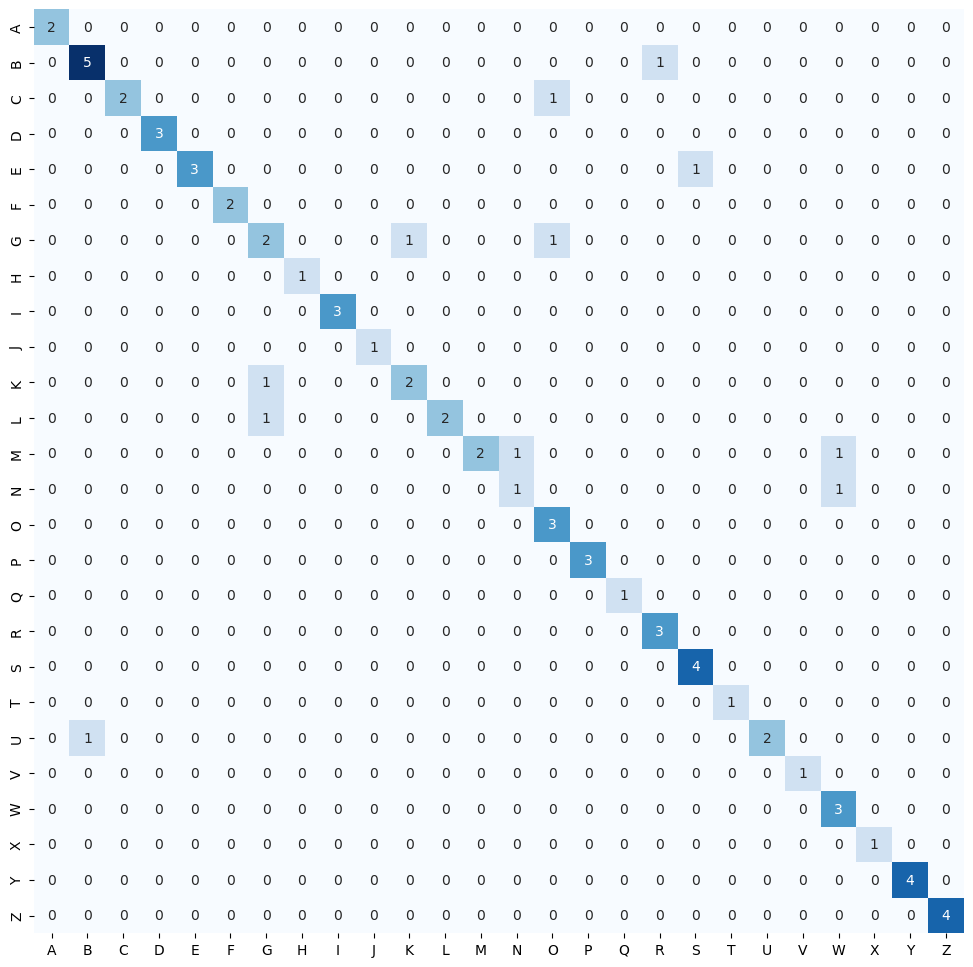

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [20]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets


In [25]:
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Assuming you have validation features (X_val) and labels (y_val)
# Replace ... with your actual data loading or preprocessing code
# X_val, y_val = ...

# Load the saved model
model = tf.keras.models.load_model('../letter.model')

# Make predictions on the validation set
y_pred = model.predict(imgs_train)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Convert one-hot encoded labels to integer labels if needed
y_true = np.argmax(model.predict(imgs_test), axis=-1)
    


3/3 [==============================] - 2s 493ms/step


ValueError: Found input variables with inconsistent numbers of samples: [72, 215]

In [26]:
y_true.shape()

TypeError: 'tuple' object is not callable

In [ ]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the results
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

# Get a detailed classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


In [ ]:
from klear.metrics import accuracy